In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# json data load (products.json)
import json

with open('/content/drive/MyDrive/Kakao_Tech_BootCamp/Team Mission/Dummy_data/products.json', 'r') as file:
  products = json.load(file)

print(products)

[{'product_id': 1, 'product_name': '밀크 클래식 쌀과자 240g -과자-', 'product_explanation': '진한 우유향이 매력적인 쌀과자', 'product_image': 'image_1_1.jpg', 'product_detail_image': 'image_1_2.jpg', 'product_price': 4500, 'product_inventory': 110, 'category': '간식/과자', 'discount': 8, 'create_time': '2023-12-19 20:25:28', 'update_time': '2024-08-12 16:24:31.138675', 'cart_id': None, 'member_id': 4, 'review_star': 4.8, 'product_quanity': 450}, {'product_id': 2, 'product_name': '새우깡 미니팩 30g X 4입 -과자-', 'product_explanation': '가볍게 증기는 고소한 새우맛 과자', 'product_image': 'image_2_1.jpg', 'product_detail_image': 'image_2_2.jpg', 'product_price': 2250, 'product_inventory': 120, 'category': '간식/과자', 'discount': 10, 'create_time': '2022-12-31 23:14:21', 'update_time': '2024-08-12 16:24:31.138699', 'cart_id': None, 'member_id': 3, 'review_star': 4.9, 'product_quanity': 480}, {'product_id': 3, 'product_name': '마카로니 과자 305g -과자-', 'product_explanation': '자꾸만 손이 가는 추억의 마카로니 과자', 'product_image': 'image_3_1.jpg', 'product_detai

# **분석목표**

현재 이 서비스에 사용되는 RecSys Model은 회귀 기반 추천 시스템 모델. 특정 사용자나 제품의 특성을 바탕으로 연속적인 예측 값을 생성하는 모델을 사용하여 추천을 제공하는 방식.

---

구체적인 기법:

1.   **Content-Based Filtering (콘텐츠 기반 필터링)**:
    이 코드에서는 제품의 여러 특성(product_price, product_inventory, discount, product_quanity)을 사용하여 특정 제품의 리뷰 점수(review_star)를 예측. 이는 콘텐츠 기반 필터링에서 주로 사용하는 접근 방식. 콘텐츠 기반 필터링은 사용자의 과거 행동이나 제품의 특성을 바탕으로 유사한 제품을 추천하는 방법.제품의 특성들을 사용해 review_star를 예측하고, 예측된 값을 기반으로 사용자가 좋아할 만한 제품을 추천.
2.   **Regression-Based Recommendation (회귀 기반 추천 시스템**):
    이 시스템은 회귀 모델을 사용하여 특정 제품에 대해 사용자가 줄 리뷰 점수를 예측. 이 예측된 리뷰 점수를 이용해 제품을 추천하는 방식. 회귀 기반 추천 시스템은 주로 연속적인 피드백(예: 별점, 점수)을 예측하기 위해 사용.

3. **Hybrid Approach 가능성 (혼합 접근법의 가능성**):
    비록 명시적으로 사용하지 않았지만, 이 시스템은 하이브리드 접근법으로 확장될 가능성도 있음. 예를 들어, 협업 필터링 기법을 결합하거나, 콘텐츠 기반 필터링에 추가적인 사용자 데이터를 통합할 수 있음.

---


그러면 어떠한 모델 사용 및 어떠한 평가 지표를 사용할것이냐?

데이터 EDA과정에서 VIF(모든 변수들에 데한 다중공선성)을 확인할것. VIF 값이 높다면, 특성 간의 상관관계가 높아 회귀 모델에 문제를 일으킬 수 있음.


---

**모델 선택. (Linear Regression은 Test.Ver로 사용)**

Linear Regression: 기본적인 선형 회귀 모델.

Ridge Regression: L2 규제를 추가하여 과적합을 방지하는 회귀 모델.

Lasso Regression: L1 규제를 추가하여 불필요한 특성을 제거하는 회귀 모델.

Random Forest: 여러 개의 결정 트리를 결합하여 예측 성능을 높이는 앙상블 방법.

XGBoost: 성능이 뛰어난 부스팅 알고리즘을 사용하는 회귀 및 분류 모델.

LightGBM: XGBoost와 유사하지만 더 빠르고 가벼운 부스팅 모델.

Gradient Boosting: 가중치를 부여하며 예측 오차를 줄이는 부스팅 모델.

Support Vector Machine (SVM): 초평면을 이용해 회귀 분석을 수행하는 모델.

K-Nearest Neighbors (KNN): 가장 가까운 데이터 포인트를 기반으로 예측하는 모델.

Ensemble Techniques: 여러 모델을 결합하여 더 나은 예측 성능을 얻는 방법.

---

**평가 지표**

Mean Squared Error (MSE): 예측값과 실제값의 차이를 제곱해 평균을 낸 값. 큰 오차에 대해 더 큰 벌점을 부과.

Mean Absolute Error (MAE): 예측값과 실제값의 절대적인 차이를 평균한 값. 이상치에 덜 민감.

Root Mean Squared Error (RMSE): MSE의 제곱근으로, 예측 오차를 원래 단위로 평가.

R-squared (R2R^2R2): 모델이 데이터의 변동을 얼마나 잘 설명하는지를 나타내는 지표.

Mean Absolute Percentage Error (MAPE): 예측 오차를 백분율로 표현한 값.

---

모델 최적화 프로세스:
다양한 모델을 훈련시킨 후, 각 모델의 MSE, MAE, RMSE, R2R^2R2, MAPE 값을 비교합니다.

가장 낮은 MSE, MAE, RMSE 값을 가지는 모델과 가장 높은 R2R^2R2 값을 가지는 모델을 선택합니다.

특정 지표에서 성능이 더 좋더라도, 모든 지표를 고려하여 종합적으로 성능이 우수한 모델을 최종적으로 선택합니다.

MSE: 낮을수록 좋습니다. MSE가 낮다는 것은 예측값이 실제값에 가깝다는 것을 의미

MAE: 낮을수록 좋습니다. MAE가 낮을수록 예측값이 실제값에 가깝다는 것을 의미

RMSE: 낮을수록 좋습니다. RMSE가 낮다는 것은 모델이 예측을 잘했다는 것을 의미

R-squared: 0에서 1 사이의 값을 가지며, 1에 가까울수록 좋습니다.

MAPE: 낮을수록 좋습니다. MAPE가 낮을수록 예측이 정확하다는 의미



---



# **0. 라이브러리 설치**

**필요한 라이브러리 임포트**
* pandas: 데이터를 다루기 위한 라이브러리입니다. JSON 파일을 읽어오고, 데이터프레임 형식으로 변환합니다.
*  numpy: 수치 계산을 위한 라이브러리로, 배열과 수학적 계산을 처리합니다
*  matplotlib.pyplot: 데이터 시각화를 위한 라이브러리입니다.
*  seaborn: matplotlib를 기반으로 한 시각화 라이브러리로, 보다 직관적인 그래프를 그릴 수 있게 도와줍니다.

In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# **1. VIF를 확인 및 시각화**

**1. 필요한 라이브러리 임포트**
* pandas: 데이터를 다루기 위한 라이브러리입니다. JSON 파일을 읽어오고, 데이터프레임 형식으로 변환합니다.
*  numpy: 수치 계산을 위한 라이브러리로, 배열과 수학적 계산을 처리합니다
*  matplotlib.pyplot: 데이터 시각화를 위한 라이브러리입니다.
*  seaborn: matplotlib를 기반으로 한 시각화 라이브러리로, 보다 직관적인 그래프를 그릴 수 있게 도와줍니다.
---
**2. 데이터 불러오기**
* pd.read_json: JSON 파일을 읽어와서 pandas 데이터프레임으로 변환합니다. 이 데이터프레임을 df 변수에 저장합니다.
---
**3. 타겟 변수와 특성 변수 분리 및 전처리**
* X: product_price(타겟 변수)를 제외한 나머지 특성들을 저장합니다.
* y: product_price(타겟 변수)를 저장합니다.
* pd.get_dummies: 범주형 변수에 대해 원핫 인코딩을 수행하여 숫자형 데이터로 변환합니다. 이는 모델에 입력할 수 있는 형태로 변환하기 위한 과정입니다.
---
**4. 숫자형 데이터만 선택**
* 데이터프레임에서 숫자형 데이터만 선택하여 X_numeric에 저장합니다. VIF 계산은 숫자형 데이터에 대해서만 수행됩니다.
---
**5. Inf와 NaN 값 처리**
* replace([np.inf, -np.inf], np.nan): 데이터에서 inf와 -inf 값을 NaN으로 변환합니다. 이는 수치적으로 무한대 값이 들어가는 경우를 처리하기 위함입니다.
* dropna(axis=1, how='any'): NaN 값을 포함한 열을 제거합니다. 이를 통해 이후 모델 훈련 및 VIF 계산에서 발생할 수 있는 오류를 방지합니다.
---
**6. VIF 계산 함수 정의**
* calculate_vif 함수: 각 특성에 대한 VIF 값을 계산하는 함수입니다. VIF는 다중공선성을 측정하는 지표로, 특정 변수가 다른 변수들과 얼마나 강하게 상관관계를 가지는지를 나타냅니다.
* variance_inflation_factor: 각 변수의 VIF를 계산합니다.
* vif_data: 특성 이름과 VIF 값을 포함하는 데이터프레임을 반환합니다.
---
**7. VIF 계산 및 시각화**
* VIF 계산: calculate_vif 함수를 통해 VIF 값을 계산하고, 이를 vif_df 데이터프레임에 저장합니다.
* VIF 시각화: seaborn을 사용해 VIF 값을 막대 그래프로 시각화하여 어떤 변수가 높은 VIF 값을 가지고 있는지 확인합니다.
---
**8. VIF 값이 높은 변수 제거**
* VIF가 10 이상인 변수 제거: VIF 값이 10을 초과하는 변수를 찾고, 해당 변수를 X_numeric에서 제거합니다.
* 재계산 및 출력: 변수를 제거한 후 다시 VIF를 계산하여 다중공선성 문제가 해결되었는지 확인합니다.
---
**9. 조정 후 VIF 시각화**
* 조정된 VIF 값 시각화: 제거 후의 VIF 값을 다시 시각화하여 다중공선성이 줄어들었는지 확인합니다.
---

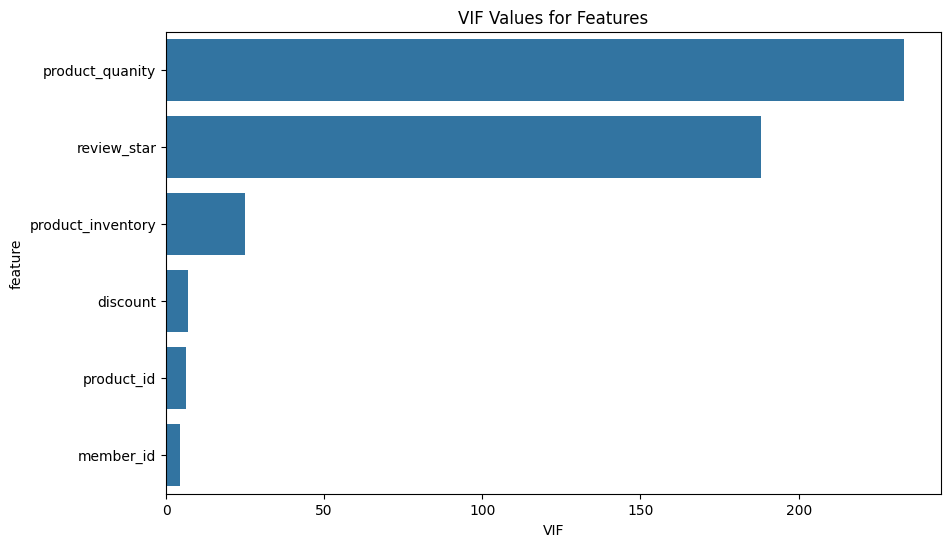

VIF 값이 높은 특성(들): product_inventory, review_star, product_quanity
VIF 조정 후 결과:
      feature       VIF
0  product_id  5.385184
1    discount  5.537582
2   member_id  2.198917


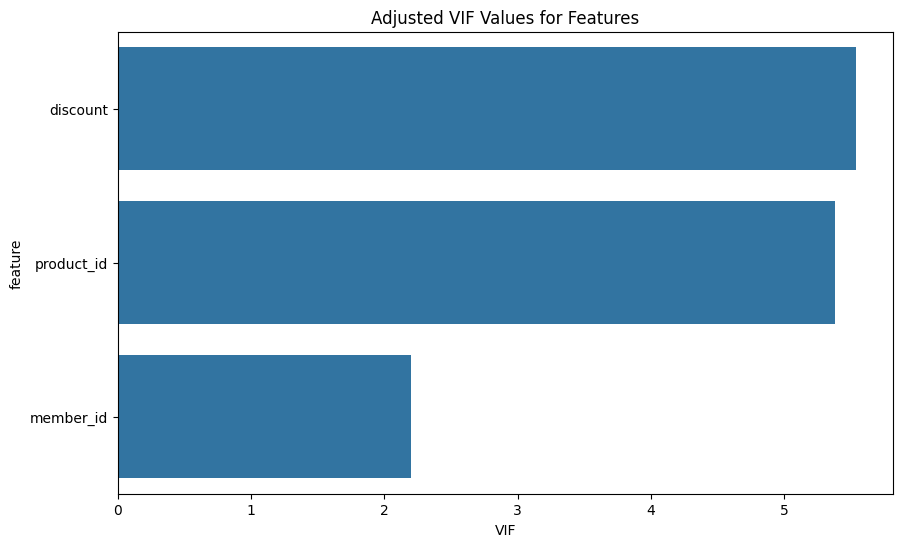

In [37]:
# JSON 파일에서 데이터 불러오기
df = pd.read_json('/content/drive/MyDrive/Kakao_Tech_BootCamp/Team Mission/Dummy_data/products.json')

# 필요한 컬럼 선택 및 전처리
X = df.drop(columns=['product_price'])  # 타겟 변수를 제외한 특성 데이터
y = df['product_price']  # 타겟 데이터

# 필요에 따라 원핫 인코딩 수행
X = pd.get_dummies(X, drop_first=True)

# 숫자형 데이터만 선택
X_numeric = X.select_dtypes(include=[np.number])

# Inf와 NaN 값 처리
X_numeric = X_numeric.replace([np.inf, -np.inf], np.nan)  # Inf 값을 NaN으로 대체
X_numeric = X_numeric.dropna(axis=1, how='any')  # NaN 값을 포함한 열 제거

# VIF 계산 함수 정의
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# VIF 계산
vif_df = calculate_vif(X_numeric)

# VIF 값을 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="feature", data=vif_df.sort_values(by="VIF", ascending=False))
plt.title('VIF Values for Features')
plt.show()

# VIF 값이 높으면 제거 또는 조정
# 예시: VIF 값이 10 이상인 경우 다중공선성이 높다고 간주하고 제거
high_vif_features = vif_df[vif_df["VIF"] > 10]["feature"]

if not high_vif_features.empty:
    print(f"VIF 값이 높은 특성(들): {', '.join(high_vif_features)}")
    X_numeric = X_numeric.drop(columns=high_vif_features)
    # VIF 값 재계산
    vif_df = calculate_vif(X_numeric)
    print("VIF 조정 후 결과:")
    print(vif_df)
else:
    print("다중공선성 문제가 없습니다.")

# 조정 후 다시 VIF 값을 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="feature", data=vif_df.sort_values(by="VIF", ascending=False))
plt.title('Adjusted VIF Values for Features')
plt.show()


# **2. 모델 학습 및 평가**

**1. 데이터 분할 및 표준화**
* train_test_split: 데이터를 학습용과 테스트용으로 나누는 함수입니다. 80%의 데이터를 학습용으로, 20%의 데이터를 테스트용으로 사용합니다.
* StandardScaler: 특성 데이터를 표준화하여 모델의 성능을 향상시킵니다.
---
**2. 모델 초기화**
* 여러 회귀 모델(선형 회귀, Ridge, Lasso, Random Forest XGBoost, LightGBM, Gradient Boosting, SVM, KNN 등)을 초기화합니다.
* ensemble_models 딕셔너리에서 간단한 평균 앙상블 모델을 정의했습니다. 앙상블 모델은 다양한 개별 모델의 예측 결과를 평균하여 사용합니다.
---
**3. 모델 학습 및 평가**
* evaluate_model: 주어진 모델을 학습시키고, 테스트 데이터에 대해 예측을 수행한 후, 다양한 평가 지표(MSE, MAE, RMSE, R-squared, MAPE)를 계산합니다.
* 각 모델에 대해 MSE, MAE, RMSE, R-squared, MAPE를 계산하고, 이를 results 딕셔너리에 저장합니다.
---
**4. 평가지표별 순위 계산**
* 각 평가 지표에 대해 순위를 매깁니다. MSE, MAE, RMSE, MAPE는 값이 작을수록 순위가 높아지며, R-squared는 값이 클수록 순위가 높아집니다.
---
**5. 가중치 적용 및 종합 순위 계산**
* 각 평가지표에 대해 설정한 가중치를 적용하여 종합 점수를 계산합니다. 총점이 낮을수록 좋은 모델로 평가됩니다.
가중치는
  * MSE, MAE = 2,
  * RMSE = 1,
  * MAPE, R-squared = 0.5 로 지정했습니다.

In [39]:
# 데이터 분할 및 표준화
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 사용할 모델들 초기화
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(),
}

# 앙상블 모델 추가 (평균 앙상블)
ensemble_models = {
    "Ensemble (Avg)": lambda X_train, y_train: np.mean([
        models["Random Forest"].fit(X_train, y_train).predict(X_train),
        models["Gradient Boosting"].fit(X_train, y_train).predict(X_train),
        models["XGBoost"].fit(X_train, y_train).predict(X_train)
    ], axis=0)
}

# 모델 평가 함수 정의
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    return mse, mae, rmse, r2, mape

# 각 모델에 대해 성능 평가
results = {}

for name, model in models.items():
    mse, mae, rmse, r2, mape = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    }

# 앙상블 모델 평가
for name, predict_func in ensemble_models.items():
    y_pred = predict_func(X_train_scaled, y_train)
    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_pred)
    mape = mean_absolute_percentage_error(y_train, y_pred)

    results[name] = {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R-squared": r2,
        "MAPE": mape
    }

# 평가 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results).T

# 각 평가지표별로 순위 매기기 (값이 작을수록 좋은 지표는 오름차순, R-squared는 내림차순)
results_df['MSE Rank'] = results_df['MSE'].rank(ascending=True)
results_df['MAE Rank'] = results_df['MAE'].rank(ascending=True)
results_df['RMSE Rank'] = results_df['RMSE'].rank(ascending=True)
results_df['R-squared Rank'] = results_df['R-squared'].rank(ascending=False)
results_df['MAPE Rank'] = results_df['MAPE'].rank(ascending=True)

# 가중치 적용한 종합 점수 계산
results_df['Total Score'] = (
    2.0 * results_df['MSE Rank'] +
    2.0 * results_df['MAE Rank'] +
    1.0 * results_df['RMSE Rank'] +
    0.5 * results_df['R-squared Rank'] +
    0.5 * results_df['MAPE Rank']
)

# 총점이 낮을수록 순위가 높음
results_df['Overall Rank'] = results_df['Total Score'].rank(ascending=True)

# 평가 지표 점수 테이블 출력
scores_table = results_df[['MSE', 'MAE', 'RMSE', 'R-squared', 'MAPE']]
print("평가지표 점수:\n", scores_table)

# 평가지표별 순위 테이블 출력
rank_table = results_df[['MSE Rank', 'MAE Rank', 'RMSE Rank', 'R-squared Rank', 'MAPE Rank']]
print("\n평가지표별 순위:\n", rank_table)

# 종합 점수 및 최종 순위 테이블 출력
total_score_table = results_df[['Total Score', 'Overall Rank']]
print("\n가중치 적용 후 점수합산 및 종합순위:\n", total_score_table)

# 최적 모델 출력
best_model_name = results_df['Overall Rank'].idxmin()
print(f"\n가장 성능이 좋은 모델은: {best_model_name}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 3
[LightGBM] [Info] Start training from score 17039.062500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b